In [17]:
%%html 
<style>h1, h2, h3, h4, h5 {font-weight: normal !important}</style>

https://assessment.hackerearth.com/challenges/hiring/amazon-ml-engineer-hiring-challenge-may21-round-1/problems/8f7fbc2f754c4222ae917f7b05d3de4c/

In [1]:
# imports

import warnings
from pathlib import Path
import os

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
pd.options.display.max_columns = 30

## Data load

In [3]:
data_path = Path('C:/Users/tharu/datasets/amazon_hacker_earth/')
train_df = pd.read_csv(data_path/'Train.csv')
test_df = pd.read_csv(data_path/'Test.csv')
sample_submission = pd.read_csv(data_path/'sample submission.csv')

sample_submission.head()

,EmpID,BiasInfluentialFactor,FitmentPercent
0,5664,MaritalStatus,25.14
1,23568,DegreeBranch,91.44
2,21490,MartialStatus,76.92
3,8363,HighestDegree,77.92
4,6165,Gender,85.64


In [4]:
train_df.shape, test_df.shape

((13645, 22), (8745, 20))

In [5]:
# drop non important columns EmpID, EmpName
train_df.drop(['EmpID', 'EmpName'], axis=1, inplace=True)
test_df.drop(['EmpID', 'EmpName'], axis=1, inplace=True)

In [6]:
target = train_df.FitmentPercent
bias_factor = train_df.BiasInfluentialFactor

In [7]:
train_df.drop(['FitmentPercent', 'BiasInfluentialFactor'], axis=1, inplace=True)
train_df.shape, test_df.shape

((13645, 18), (8745, 18))

## EDA

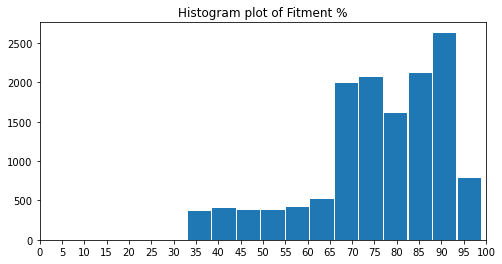

In [8]:
plt.figure(figsize=(8, 4))
plt.hist(target, bins=20, range=(0, 110), rwidth=0.95)
plt.xticks(range(0, 110, 5))
plt.title('Histogram plot of Fitment %')
plt.xlim(0, 100);

### Null value check

In [20]:
train_df.isnull().sum().sum()

0

In [21]:
test_df.isnull().sum().sum()

0

In [25]:
# null values in bias_influential_factor
bias_factor.isnull().sum()

3336

In [26]:
train_df.columns

Index(['LanguageOfCommunication', 'Age', 'Gender', 'JobProfileIDApplyingFor',
       'HighestDegree', 'DegreeBranch', 'GraduatingInstitute',
       'LatestDegreeCGPA', 'YearsOfExperince', 'GraduationYear', 'CurrentCTC',
       'ExpectedCTC', 'MartialStatus', 'EmpScore', 'CurrentDesignation',
       'CurrentCompanyType', 'DepartmentInCompany', 'TotalLeavesTaken'],
      dtype='object')

In [35]:
train_df[bias_factor.isnull()]

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
1,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,3,2018,15,19,Married,5,BA,MidSized,Engineering,6
10,Hindi,29,Male,JR85289,B.Tech,Artificial Intelligence,Tier 1,7,6,2015,9,16,Married,3,EM,Enterprise,Finance,6
13,Hindi,27,Male,JR85289,B.Tech,Computer Science,Tier 1,5,4,2017,17,26,Married,2,EM,Enterprise,Engineering,20
17,English,34,Male,JR81165,M.Tech,Electrical,Tier 2,7,8,2013,12,18,Married,5,SSE,Enterprise,Design,16
22,Native,34,Male,JR87525,B.Tech,Electronics,Tier 1,7,11,2010,9,15,Married,3,SSE,Enterprise,Finance,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13630,Hindi,40,Male,JR87525,PhD,Electronics,Tier 2,8,10,2011,29,34,Single,3,EM,MidSized,Engineering,7
13631,English,33,Male,JR85289,PhD,Artificial Intelligence,Tier 2,8,3,2018,7,16,Single,3,EM,MidSized,Engineering,19
13633,English,32,Other,JR88873,B.Tech,Information Technology,Tier 1,5,9,2012,16,20,Married,3,DS,MidSized,Design,10
13635,English,35,Male,JR85289,PhD,Artificial Intelligence,Tier 2,5,5,2016,11,19,Married,5,SDE,MidSized,Product,10


In [34]:
train_df[bias_factor.isnull()].JobProfileIDApplyingFor.value_counts()*100/3336

JR85289    34.022782
JR87525    25.779376
JR88879     9.142686
JR89890     8.842926
JR88873     7.763789
JR81165     4.826139
JR79193     4.676259
JR88654     3.237410
JR70175     1.708633
Name: JobProfileIDApplyingFor, dtype: float64

In [31]:
train_df.JobProfileIDApplyingFor.value_counts()*100/len(train_df)

JR85289    34.422866
JR87525    25.034811
JR88879     9.021620
JR89890     8.479296
JR88873     8.230121
JR81165     4.990839
JR79193     4.968853
JR88654     3.078051
JR70175     1.773543
Name: JobProfileIDApplyingFor, dtype: float64